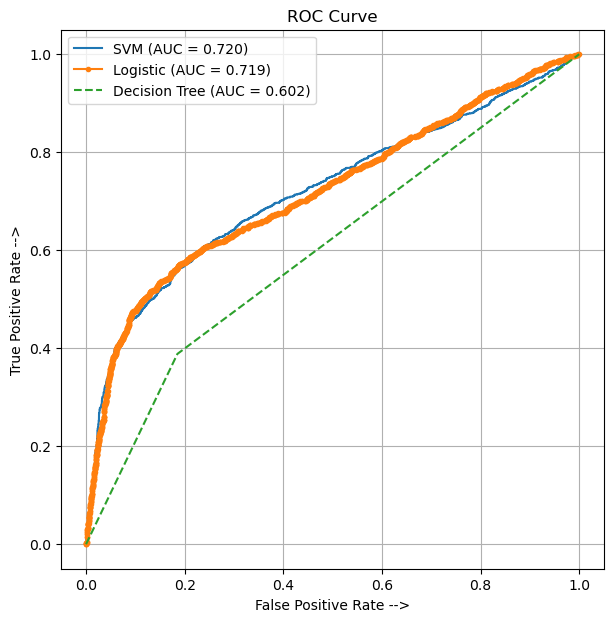

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Load the dataset
data = pd.read_csv('default of credit card clients.csv', header=1)

# Create DataFrame
df = pd.DataFrame(data)

# Separate features and target variable
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# SVM (Support Vector Machine) classifier
model_SVC = SVC(kernel='rbf', random_state=4, probability=True)  # Set probability=True for ROC
model_SVC.fit(X_train, y_train)
y_pred_svm = model_SVC.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Logistic Regression classifier
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Decision Tree classifier
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Plot ROC and AUC curve
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred_dt)
auc_dt = auc(dt_fpr, dt_tpr)

# Plotting
plt.figure(figsize=(7, 7), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (AUC = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (AUC = %0.3f)' % auc_logistic)
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree (AUC = %0.3f)' % auc_dt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()